# LPSD basic usage

In [1]:
%pylab inline
import pandas as pd
from lpsd import lpsd

Populating the interactive namespace from numpy and matplotlib


## Import as DataFrame

In [2]:
data = pd.read_csv("time_series.csv.gz", index_col=0)
data.head()

Phase 1   Phase 2  Difference
Time (s)                                
0.000000 -0.599113 -0.605341    0.006228
0.033554 -0.177387 -0.183603    0.006216
0.067109  0.244375  0.238147    0.006229
0.100663  0.666063  0.659830    0.006233
0.134218  1.087660  1.081447    0.006214

## Calculate spectrum for one column

In [3]:
spectrum = lpsd(data["Difference"])
spectrum.head()

ps           psd        ps_std       psd_std      enbw  \
frequency                                                                     
0.002981   1.141530e-13  1.329975e-11  1.141530e-13  1.329975e-11  0.008583   
0.005961   7.378880e-14  8.596990e-12  7.378880e-14  8.596990e-12  0.008583   
0.008942   4.035094e-14  4.701210e-12  4.035094e-14  4.701210e-12  0.008583   
0.011922   1.801290e-14  2.098648e-12  1.801290e-14  2.098648e-12  0.008583   
0.014903   5.779845e-15  6.733985e-13  5.779845e-15  6.733985e-13  0.008583   

                    asd  
frequency                
0.002981   3.646882e-06  
0.005961   2.932062e-06  
0.008942   2.168227e-06  
0.011922   1.448671e-06  
0.014903   8.206086e-07

In [4]:
spectrum["asd"].plot(logx=True, logy=True)
ylabel("ASD (rad/√Hz)")
grid()

## Calculate spectrum for multiple columns

In [5]:
spectra = lpsd(data, detrending_order=1)

Returns dict of spectra:
```python
spectra = {
    "Phase 1":    <DataFrame_Phase_1>,
    "Phase 2":    <DataFrame_Phase_2>,
    "Difference": <DataFrame_Difference>,
}
```

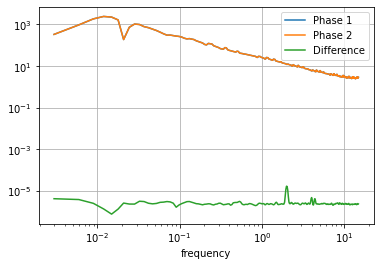

In [6]:
plot = spectra["Phase 1"]["asd"].plot(logx=True, logy=True)
spectra["Phase 2"]["asd"].plot(logx=True, logy=True, ax=plot.axes)
spectra["Difference"]["asd"].plot(logx=True, logy=True, ax=plot.axes)

legend(["Phase 1", "Phase 2", "Difference"])
grid()